In [60]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

tca_results1 = r"D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\2_inter-comparison\Data\WaPOR-MOD16-PMLv2.csv"
tca_results2 = r"D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\2_inter-comparison\Data\WaPOR-SSEBop-PMLv2.csv"
dc_results = r'D:/Doctorate/Bich_PhD/research/3_WaPOR/Notebooks/1_insitu-comparison/222sites_metrics_WaPOR.csv'


In [40]:
df_dc = pd.read_csv(dc_results,index_col=1)
df_dc = df_dc[['r','urmse']]
df_dc

,r,urmse
Site,,
AR-TF1,0.841239,0.230999
CA-Cbo,0.868772,0.631623
CA-DB2,0.898286,0.568282
CA-DBB,0.857029,0.473954
CA-ER1,0.663737,0.760949
...,...,...
SE-Deg,0.850557,0.402826
SE-Htm,0.731455,0.733581
SE-Nor,0.821229,0.633674


In [43]:
df_tc1 = pd.read_csv(tca_results1,index_col=1)
df_tc1 = df_tc1[['rhoX','sigmaX']]
df_tc1

,rhoX,sigmaX
Site,,
US-Ha1,0.976804,0.432338
CA-Cbo,0.974009,0.380290
US-Ho2,0.982957,0.278084
US-MMS,0.973660,0.472106
US-Var,0.764190,0.618626
...,...,...
AU-War,0.951769,0.310949
AU-Cum,0.828015,0.435598
AU-Lit,0.293730,1.031972


In [44]:
df_tc2 = pd.read_csv(tca_results2,index_col=1)
df_tc2 = df_tc2[['rhoX','sigmaX']]
df_tc2

,rhoX,sigmaX
Site,,
US-Ha1,0.977147,0.429793
CA-Cbo,0.972961,0.388243
US-Ho2,0.981421,0.297154
US-MMS,0.985444,0.353570
US-Var,0.887316,0.449102
...,...,...
AU-Cum,0.874148,0.395269
AU-Lit,0.343297,0.991665
AU-Rgf,0.899502,0.279016


In [46]:
df_merge1 = pd.merge(df_tc1,df_dc,left_index=True,right_index=True)
df_merge1

,rhoX,sigmaX,r,urmse
Site,,,,
US-Ha1,0.976804,0.432338,0.938511,0.991569
CA-Cbo,0.974009,0.380290,0.868772,0.631623
US-Ho2,0.982957,0.278084,0.867082,0.662390
US-MMS,0.973660,0.472106,0.956651,0.830711
US-Var,0.764190,0.618626,0.186509,1.010739
...,...,...,...,...
AU-War,0.951769,0.310949,0.656635,0.593051
AU-Cum,0.828015,0.435598,0.341750,0.783312
AU-Lit,0.293730,1.031972,0.241257,0.958535


In [47]:
df_merge2 = pd.merge(df_tc2,df_dc,left_index=True,right_index=True)
df_merge2

,rhoX,sigmaX,r,urmse
Site,,,,
US-Ha1,0.977147,0.429793,0.938511,0.991569
CA-Cbo,0.972961,0.388243,0.868772,0.631623
US-Ho2,0.981421,0.297154,0.867082,0.662390
US-MMS,0.985444,0.353570,0.956651,0.830711
US-Var,0.887316,0.449102,0.186509,1.010739
...,...,...,...,...
AU-Cum,0.874148,0.395269,0.341750,0.783312
AU-Lit,0.343297,0.991665,0.241257,0.958535
AU-Rgf,0.899502,0.279016,0.183603,0.578915


# Plots

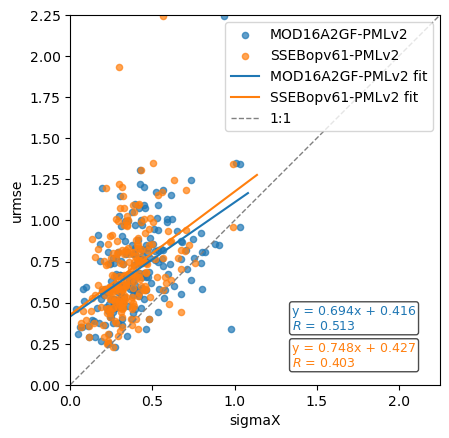

In [63]:
fig, ax = plt.subplots(1, 1)

# scatter
df_merge1.plot.scatter(x='sigmaX', y='urmse', ax=ax, label='MOD16A2GF-PMLv2', color='C0', alpha=0.7)
df_merge2.plot.scatter(x='sigmaX', y='urmse', ax=ax, label='SSEBopv61-PMLv2', color='C1', alpha=0.7)

# combine points (if you want one regression for both series together) OR do separately:
# Here we add separate linear fits for each series.

def add_regression(x, y, ax, color, label_prefix, xpos=0.05, ypos=None):
    mask = (~np.isnan(x)) & (~np.isnan(y))
    if mask.sum() < 2:
        return
    xk, yk = x[mask].values, y[mask].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(xk, yk)
    # regression line
    xs = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    ys = intercept + slope * xs
    ax.plot(xs, ys, color=color, linestyle='-', linewidth=1.5, label=f'{label_prefix} fit')
    # equation and r
    if ypos is None:
        ypos = 0.9 if color == 'C0' else 0.8
    txt = f'y = {slope:.3f}x + {intercept:.3f}\n$R$ = {r_value:.3f}'
    ax.text(xpos, ypos, txt, transform=ax.transAxes, color=color, fontsize=9,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

# add regressions
add_regression(df_merge1['sigmaX'], df_merge1['urmse'], ax, color='C0', label_prefix='MOD16A2GF-PMLv2', xpos= 0.6,ypos=0.15)
add_regression(df_merge2['sigmaX'], df_merge2['urmse'], ax, color='C1', label_prefix='SSEBopv61-PMLv2', xpos=0.6,ypos=0.05)

# 1:1 dashed line
lims = [0, 2.25]
ax.plot(lims, lims, linestyle='--', color='gray', linewidth=1, label='1:1')

ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_aspect('equal', adjustable='box')
ax.legend()
ax.set_xlabel('sigmaX')
ax.set_ylabel('urmse')
plt.show()


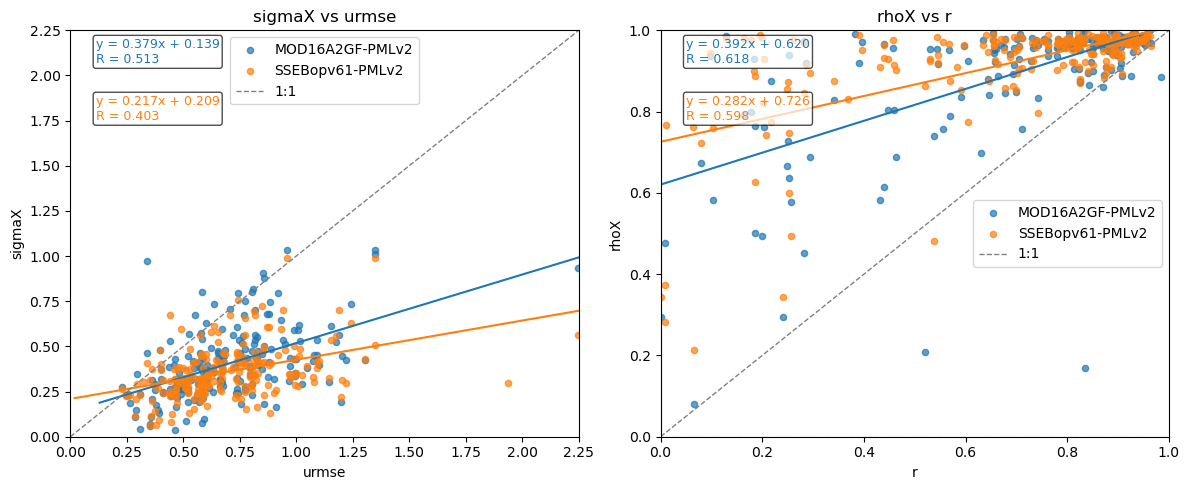

In [70]:
def add_regression(x, y, ax, color, ypos=None):
    mask = (~np.isnan(x)) & (~np.isnan(y))
    if mask.sum() < 2:
        return
    xk, yk = x[mask].values, y[mask].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(xk, yk)
    xs = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    ys = intercept + slope * xs
    ax.plot(xs, ys, color=color, linestyle='-', linewidth=1.5)
    txt = f'y = {slope:.3f}x + {intercept:.3f}\nR = {r_value:.3f}'
    if ypos is None:
        ypos = 0.92 if color == 'C0' else 0.78
    ax.text(0.05, ypos, txt, transform=ax.transAxes, color=color, fontsize=9,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: sigmaX vs urmse (both datasets)
ax = axes[0]
df_merge1.plot.scatter(x='urmse', y='sigmaX', ax=ax, label='MOD16A2GF-PMLv2', color='C0', alpha=0.7)
df_merge2.plot.scatter(x='urmse', y='sigmaX', ax=ax, label='SSEBopv61-PMLv2', color='C1', alpha=0.7)

add_regression(df_merge1['urmse'], df_merge1['sigmaX'], ax, color='C0', ypos=0.92)
add_regression(df_merge2['urmse'], df_merge2['sigmaX'], ax, color='C1', ypos=0.78)
lims = [0, 2.25]
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.plot(lims, lims, linestyle='--', color='gray', linewidth=1, label='1:1')
ax.legend()
ax.set_xlabel('urmse')
ax.set_ylabel('sigmaX')
ax.set_title('sigmaX vs urmse')

# Right: rhoX vs r (both datasets)
ax2 = axes[1]
df_merge1.plot.scatter(x='r', y='rhoX', ax=ax2, label='MOD16A2GF-PMLv2', color='C0', alpha=0.7)
df_merge2.plot.scatter(x='r', y='rhoX', ax=ax2, label='SSEBopv61-PMLv2', color='C1', alpha=0.7)
# set sensible limits (adjust if needed)
lims = [0, 1]
ax2.plot(lims, lims, linestyle='--', color='gray', linewidth=1, label='1:1')
ax2.set_xlim(lims)
ax2.set_ylim(lims)
add_regression(df_merge1['r'], df_merge1['rhoX'], ax2, color='C0', ypos=0.92)
add_regression(df_merge2['r'], df_merge2['rhoX'], ax2, color='C1', ypos=0.78)
ax2.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.legend()
ax2.set_xlabel('r')
ax2.set_ylabel('rhoX')
ax2.set_title('rhoX vs r')

plt.tight_layout()
plt.show()

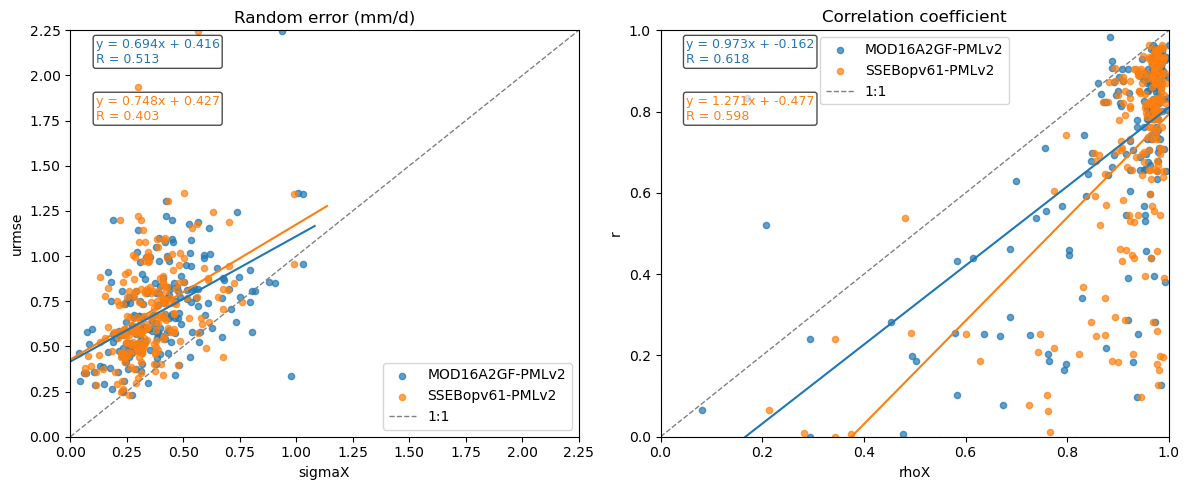

In [73]:
def add_regression(x, y, ax, color, ypos=None):
    mask = (~np.isnan(x)) & (~np.isnan(y))
    if mask.sum() < 2:
        return
    xk, yk = x[mask].values, y[mask].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(xk, yk)
    xs = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    ys = intercept + slope * xs
    ax.plot(xs, ys, color=color, linestyle='-', linewidth=1.5)
    txt = f'y = {slope:.3f}x + {intercept:.3f}\nR = {r_value:.3f}'
    if ypos is None:
        ypos = 0.92 if color == 'C0' else 0.78
    ax.text(0.05, ypos, txt, transform=ax.transAxes, color=color, fontsize=9,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: sigmaX vs urmse (both datasets)
ax = axes[0]
df_merge1.plot.scatter(x='sigmaX', y='urmse', ax=ax, label='MOD16A2GF-PMLv2', color='C0', alpha=0.7)
df_merge2.plot.scatter(x='sigmaX', y='urmse', ax=ax, label='SSEBopv61-PMLv2', color='C1', alpha=0.7)

add_regression(df_merge1['sigmaX'], df_merge1['urmse'], ax, color='C0', ypos=0.92)
add_regression(df_merge2['sigmaX'], df_merge2['urmse'], ax, color='C1', ypos=0.78)
lims = [0, 2.25]
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.plot(lims, lims, linestyle='--', color='gray', linewidth=1, label='1:1')
ax.legend()
ax.set_xlabel('sigmaX')
ax.set_ylabel('urmse')
ax.set_title('Random error (mm/d)')

# Right: rhoX vs r (both datasets)
ax2 = axes[1]
df_merge1.plot.scatter(x='rhoX', y='r', ax=ax2, label='MOD16A2GF-PMLv2', color='C0', alpha=0.7)
df_merge2.plot.scatter(x='rhoX', y='r', ax=ax2, label='SSEBopv61-PMLv2', color='C1', alpha=0.7)
# set sensible limits (adjust if needed)
lims = [0, 1]
ax2.plot(lims, lims, linestyle='--', color='gray', linewidth=1, label='1:1')
ax2.set_xlim(lims)
ax2.set_ylim(lims)
add_regression(df_merge1['rhoX'], df_merge1['r'], ax2, color='C0', ypos=0.92)
add_regression(df_merge2['rhoX'], df_merge2['r'], ax2, color='C1', ypos=0.78)
ax2.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.legend()
ax2.set_xlabel('rhoX')
ax2.set_ylabel('r')
ax2.set_title('Correlation coefficient')

plt.tight_layout()
plt.show()